In [19]:
from simulation_toykit_kspace import *
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def k_vector_norm(k):
    n = sum([n*n for n in k])
    return [i/n for i in k]
degree = np.pi/180

In [21]:
def case0():
    case_list = [[1,0,0], [0, 1, 0], [0,0,1], [1, 1, 0], [1, 0, 1], [0, 1, 1]]
    case_list = [k_vector_norm(k) for k in case_list]
    for case in case_list:
        print(f"* case={case}")
        print(kspace.get_e_field_VASM_matrix(*case))
        print(kspace.get_e_field_VASM_matrix_v1(*case))
# case0()

In [22]:
def case_xz_plane():
    case_list = [0, 10, 20, 30]
    for theta in case_list:
        x, z = np.sin(theta*degree), np.cos(theta*degree)
        k_vec = [x, 0, z]
        # kspace.get_e_field_VASM_matrix(*case)

In [23]:
# 波长
wavelength = 13.0
# 入射角
theta      = 6
# 方位角
phi        = 90
# 数值孔径
NA         = 0.9
# 放大倍率
# 通常仿真软件（如S-Litho, Calibre）为了方便，会把所有数据都归一化到晶圆尺度（Wafer Scale）
# M = 4 表示 wafer 上面用光刻机刻 10 nm 的线宽, 使用的 mask 图形的线宽就是 40 nm
M          = 4
k_mask     = (np.real(kspace.k(wavelength, NA) / M))
theta = 0
phi   = 0

In [24]:
# chief-ray in hyperlith
# 角度改变对应 nearfield 频谱的平移
shift_sigma_nearfield = kspace.theta_phi_to_sigma_xy(theta * degree, phi * degree)
print(f"shift_sigma_nearfield={shift_sigma_nearfield}")
print(f"theta,phi\t={[np.round(a/degree) for a in kspace.sigma_xy_to_theta_phi(*shift_sigma_nearfield)]}")

k_shift_in_mask = [s *kspace.k0(wavelength) for s in shift_sigma_nearfield]
sigma_shift     = [f / k_mask  for f in k_shift_in_mask]

print(f"k_shift_in_mask\t={k_shift_in_mask}\nsigma_shift\t={sigma_shift}")

shift_sigma_nearfield=[0,0]
theta,phi	=[0.0, 0.0]
k_shift_in_mask	=[0.0, 0.0]
sigma_shift	=[0.0, 0.0]


In [25]:
# border in hyperlith
blue_border_in_wafer = [1, 0] # sigmaxy
blue_border_in_mask  = [s* k_mask for s in blue_border_in_wafer]
golden_blue_border_in_mask = 0.108
print(f"blue_border_in_wafer\t={blue_border_in_wafer}\tgolden is {1}")
print(f"blue_border_in_mask\t={blue_border_in_mask}\tgolden is {golden_blue_border_in_mask}")

black_border_in_wafer = [1/NA, 0]
golden_black_border_in_wafer = 1.11
print(f"black_border_in_wafer\t={black_border_in_wafer}\tgolden is {golden_black_border_in_wafer}")
black_border_in_mask  = [s* np.real(kspace.k(wavelength, NA)) for s in black_border_in_wafer]
golden_black_border_in_mask = 0.48
print(f"black_border_in_mask\t={black_border_in_mask}\tgolden is {golden_black_border_in_mask}")

# k_propagating = k0, the maximum k-vector magnitude for a propagating wave indicated in black
# black should always be the outermost circle.
# k_object = k0 * NA_object, the projection optics aperture indicated in blue
# k_illum = sigma * k_object, the condenser optics aperture indicated in green
k0 = kspace.k0(wavelength)
print(f"black_border_in_mask_v1\t={k0}") # 
print(f"black_border_in_wafer_v1={k0/np.real(kspace.k(wavelength, NA))}")
NA_object = NA/M
k_object = k0 * NA_object
print(f"blue_border_in_mask_v1\t={k_object}")
print(f"blue_border_in_wafer_v1\t={k_object/k_mask}")
sigma_out = 0.8
NA_illumination = 1
k_illum = k0 * NA_illumination / M
print(f"green_border_in_mask\t={sigma_out * k_illum}")           # 0.096
print(f"green_border_in_wafer\t={sigma_out * k_illum/k_object}") # 0.88

blue_border_in_wafer	=[1, 0]	golden is 1
blue_border_in_mask	=[0.10874743800887746, 0.0]	golden is 0.108
black_border_in_wafer	=[1.1111111111111112, 0]	golden is 1.11
black_border_in_mask	=[0.48332194670612205, 0.0]	golden is 0.48
black_border_in_mask_v1	=0.483321946706122
black_border_in_wafer_v1=1.111111111111111
blue_border_in_mask_v1	=0.10874743800887746
blue_border_in_wafer_v1	=1.0
green_border_in_mask	=0.0966643893412244
green_border_in_wafer	=0.8888888888888888


In [26]:
# step in hyperlith
pitch = 26
sigma_step = (wavelength / pitch) * (1 / NA) 
print(f"sigma_step\t={sigma_step}") # 0.55

k_step_in_mask  = sigma_step * k_mask
print(f"k_step_in_mask\t={k_step_in_mask}") # 0.06


# sigma 范围是  [-1, 1]
# k_mask 范围是 [-k_mask, k_mask]
# 对应 hyperlith 中的蓝圈
# 灰圈对应截止频率

sigma_step	=0.5555555555555556
k_step_in_mask	=0.060415243338265257


In [27]:
wavelength = 13
NA         = 0.9
M          = 2
pitch      = 26
chief_theta= 60
theta      = chief_theta
chief_phi  = 45
phi        = chief_phi
NA_illum   = 4.5
sigma_out  = 0.8

# phi        = 0
k0               = kspace.k0(wavelength)
k_pupil          = (np.real(kspace.k(wavelength, NA) / M))
k_illum          = (np.real(kspace.k(wavelength, NA_illum) / M))

sigma_chief_ray  = kspace.theta_phi_to_sigma_xy(theta * degree, phi * degree)
chief_ray_center = [s * k0 for s in sigma_chief_ray]

RESET = "\033[0m"
BOLD = "\033[1m"
GREEN = "\033[32m"
BLUE = "\033[34m"

In [28]:
illum_left, illum_right, illum_top, illum_down = [-sigma_out, 0], [sigma_out, 0], [0, sigma_out], [0, -sigma_out]
illum_center_k = chief_ray_center
print(f"{GREEN}illum info in k-space{RESET}")
print(f"    illum center\t{illum_center_k}")
print(f"    illum left boundary\t{[k_illum * sigma_illum * -1 + k_offset for k_offset, sigma_illum in zip(illum_center_k, illum_right)]}")
print(f"    illum right boundary{[k_illum * sigma_illum* -1+ k_offset  for k_offset, sigma_illum in zip(illum_center_k, illum_left)]}")
print(f"    illum top boundary\t{[k_illum * sigma_illum*  -1+ k_offset  for k_offset, sigma_illum in zip(illum_center_k, illum_down)]}")
print(f"    illum down boundary\t{[k_illum * sigma_illum* -1+ k_offset for k_offset, sigma_illum in zip(illum_center_k, illum_top)]}")

test_point       = [0.5, 0.5]
illum_point      = [-s for s in test_point]  # sigma wafer to sigma mask
illum_point_k_vec = [k_illum * sigma + k_offset for k_offset, sigma in zip(illum_center_k, illum_point)]
print(f"    chief_ray_center={chief_ray_center} illum_point={illum_point} k-vector{illum_point_k_vec}")

test_point_in_wafer = [s * NA_illum/NA for s in test_point]
print(f"    sigmaxy in wafer={test_point_in_wafer}")


illum info in k-space
    illum center	[0.29597303772966094, 0.2959730377296609]
    illum left boundary	[-0.5740064663413587, 0.2959730377296609]
    illum right boundary[1.1659525418006806, 0.2959730377296609]
    illum top boundary	[0.29597303772966094, 1.1659525418006806]
    illum down boundary	[0.29597303772966094, -0.5740064663413588]
    chief_ray_center=[0.29597303772966094, 0.2959730377296609] illum_point=[-0.5, -0.5] k-vector[-0.24776415231472632, -0.24776415231472637]
    sigmaxy in wafer=[2.5, 2.5]


In [29]:
nf_left, nf_right, nf_top, nf_down = [-1, 0], [1, 0], [0, 1], [0, -1]
pupil_center_k = chief_ray_center
print(f"{BLUE}pupil info in k-space{RESET}")
print(f"    pupil center\t{pupil_center_k}")
print(f"    pupil left boundary\t{[k_pupil*sigma + k_offset for k_offset, sigma in zip(pupil_center_k, nf_left)]}")
print(f"    pupil right boundary{[k_pupil*sigma + k_offset  for k_offset, sigma in zip(pupil_center_k, nf_right)]}")
print(f"    pupil top boundary\t{[k_pupil*sigma + k_offset  for k_offset, sigma in zip(pupil_center_k, nf_top)]}")
print(f"    pupil down boundary\t{[k_pupil*sigma + k_offset for k_offset, sigma in zip(pupil_center_k, nf_down)]}")

pupil info in k-space
    pupil center	[0.29597303772966094, 0.2959730377296609]
    pupil left boundary	[0.07847816171190602, 0.2959730377296609]
    pupil right boundary[0.5134679137474158, 0.2959730377296609]
    pupil top boundary	[0.29597303772966094, 0.5134679137474158]
    pupil down boundary	[0.29597303772966094, 0.07847816171190597]


In [30]:
nf_left, nf_right, nf_top, nf_down = [-1, 0], [1, 0], [0, 1], [0, -1]
propagating_center_k = [0, 0]
k_propagating = k0
print(f"{BOLD}propagating info in k-space{RESET}")
print(f"    propagating center\t\t{propagating_center_k}")
print(f"    propagating left boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_left)]}")
print(f"    propagating right boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_right)]}")
print(f"    propagating top boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_top)]}")
print(f"    propagating down boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_down)]}")

propagating info in k-space
    propagating center		[0, 0]
    propagating left boundary	[-0.483321946706122, 0.0]
    propagating right boundary	[0.483321946706122, 0.0]
    propagating top boundary	[0.0, 0.483321946706122]
    propagating down boundary	[0.0, -0.483321946706122]


In [31]:
# step in hyperlith
sigma_step = (wavelength / pitch) * (1 / NA) 
print(f"sigma_step\t={sigma_step}")
k_step_in_mask  = sigma_step * k_pupil
print(f"k_step_in_mask\t={k_step_in_mask}") 
print(f"k_step_in_wafer\t={k_step_in_mask * M}") 

sigma_step	=0.5555555555555556
k_step_in_mask	=0.12083048667653051
k_step_in_wafer	=0.24166097335306103


In [32]:
def c_matrix_to_ndarray(m):
    return np.array([[ c for c in r] for r in m])
# 仿真 test_point 偏振态
# test_point_sigmaxy = [k/k0 for k in  illum_center_k]
test_k = [k0/2,k0/2]
test_k = [0,0]
test_k = [0, illum_center_k[1]]
# test_k = [0.1, -0.1]
# test_k = [0.41, 0.22]
test_point_sigmaxy = [(k-center)/k0 for center,k in  zip(illum_center_k, test_k)]
print(test_point_sigmaxy, illum_center_k, test_k)
angles = kspace.sigma_xy_to_theta_phi(*test_point_sigmaxy)
theta, phi = angles
print(f"k={illum_center_k},theta,phi={[a/degree for a in angles]}")

m0 = kspace.rotate_matrix(*angles)
m1 = kspace.rotate_matrix_v1(*angles)
print(m0)
print(m1)

a = c_matrix_to_ndarray(m0)
b = c_matrix_to_ndarray(m1)
a = np.transpose(a)
print(a-b)


roate_matrix = c_matrix_to_ndarray(kspace.rotate_matrix_v1(theta, phi))
TM_basis = roate_matrix@np.array([1,0,0]) 
# roate_matrix = c_matrix_to_ndarray(kspace.rotate_matrix(theta, phi + 0.5*np.pi))
TE_basis = roate_matrix@np.array([0,1,0])
print(TE_basis)
print(TM_basis)

[-0.6123724356957946, 0.0] [0.29597303772966094, 0.2959730377296609] [0, 0.2959730377296609]
k=[0.29597303772966094, 0.2959730377296609],theta,phi=[37.761243907035045, 180.0]
[[-0.790569,-1.22465e-16,-0.612372],[9.68168e-17,-1,7.4994e-17],[-0.612372,0,0.790569]]
[[-0.790569,9.68168e-17,-0.612372],[-1.22465e-16,-1,0],[-0.612372,7.4994e-17,0.790569]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[ 9.68168304e-17 -1.00000000e+00  7.49939943e-17]
[-7.90569415e-01 -1.22464680e-16 -6.12372436e-01]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_line(ax, color, center_list, basis_list, magnitude_list, label_list=None):
    """
    在 ax 上绘制线段。
    逻辑：输入坐标和向量 -> 归一化方向 -> 乘以长度 -> 投影到XY平面 -> 绘制以Center为中点的线段
    """
    # 确保输入是列表，方便统一处理（兼容单个输入的情况，如果调用方保证是list则不需要）
    # 这里假设调用方传入的都是 list 结构
    
    for i in range(len(center_list)):
        P = np.array(center_list[i])
        V_direction = np.array(basis_list[i])
        magnitude = magnitude_list[i]
        
        # --- 保持原有逻辑 ---
        # 1. 归一化 (在原维度，通常是3D)
        norm_V = np.linalg.norm(V_direction)
        if norm_V == 0:
            continue # 防止除零
        V_unit = V_direction / norm_V
        
        # 2. 乘以指定长度
        V_scaled = V_unit * magnitude
        
        # 3. 只取 XY 平面分量
        P_xy = P[:2]
        V_xy = V_scaled[:2]
        
        # 4. 计算线段起点和终点 (从P点向两侧延伸一半长度)
        Start_V_xy = P_xy - V_xy / 2
        End_V_xy = P_xy + V_xy / 2
        # --------------------

        # 绘制线段
        ax.plot([Start_V_xy[0], End_V_xy[0]], 
                [Start_V_xy[1], End_V_xy[1]], 
                color=color, linestyle='-', linewidth=1, 
            )
        
        # 可选：绘制中心点，标记位置
        ax.plot(P_xy[0], P_xy[1], 'o', color=color, markersize=0.5)


def plot_ellipse(ax, color, center_list, basis_list, magnitude_list, ellipticity_list):
    """
    在 ax 上绘制椭圆。
    逻辑：基于基向量的方向确定旋转角度，基于magnitude确定长轴，基于ellipticity确定短轴。
    """
    for i in range(len(center_list)):
        P = np.array(center_list[i])
        V_direction = np.array(basis_list[i])
        magnitude = magnitude_list[i] * 2
        ellipticity = ellipticity_list[i]
        
        # 取 XY 平面坐标作为中心
        x, y = P[:2]
        
        # 计算旋转角度
        # 假设基向量在 XY 平面上的投影决定了椭圆的长轴方向
        V_xy = V_direction[:2]
        
        # 使用 arctan2 计算弧度，然后转为度数
        # 注意：如果 V_xy 为 [0,0]，角度可能无意义，这里做个简单的防错
        if np.linalg.norm(V_xy) > 0:
            current_dir_angle = np.arctan2(V_xy[1], V_xy[0])
        else:
            current_dir_angle = 0.0
            
        ellipse_angle_degrees = np.degrees(current_dir_angle)

        # 参考你提供的逻辑
        width_to_plot = magnitude  # 长轴长度 (User wants major axis length to be 'scala')
        height_to_plot = width_to_plot * abs(ellipticity) # 短轴长度

        # 创建椭圆对象
        ellipse = Ellipse(
            xy=(x, y),
            width=width_to_plot,
            height=height_to_plot,
            angle=ellipse_angle_degrees,
            facecolor='none',       # 空心
            edgecolor=color,        # 边框颜色
            linewidth=2,            # 对应 ellipse_linewidth
            alpha=1.0,              # 对应 ellipse_alpha
            zorder=1                # 图层顺序
        )
        
        ax.add_patch(ellipse)



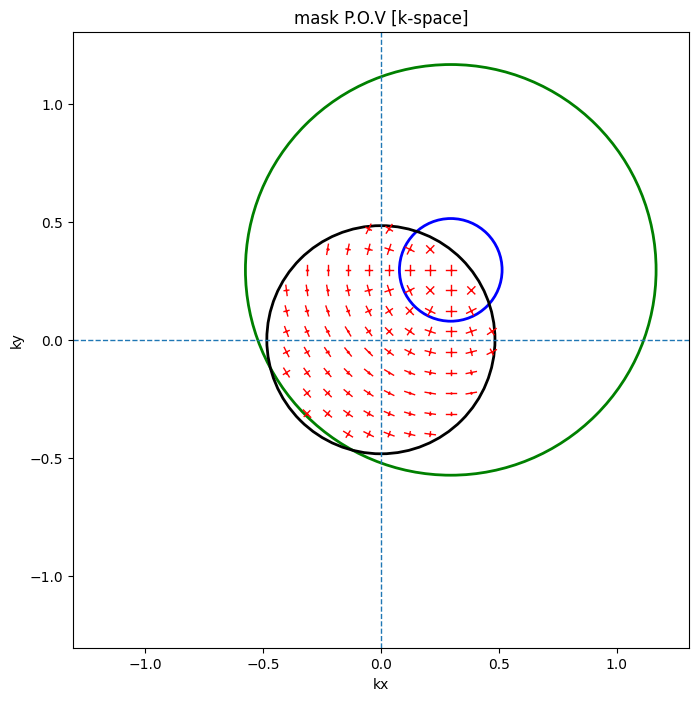

In [34]:
def sample_points_in_circle(center, radius, half_size):
    x0, y0 = center
    x = np.linspace(-half_size, half_size, half_size*2 + 1)
    y = np.linspace(-half_size, half_size, half_size*2 + 1)
    step = radius / half_size
    x = x*step + x0
    y = y*step + y0
    xx, yy = np.meshgrid(x, y, indexing="xy")
    mask = (xx - x0)**2 + (yy - y0)**2 <= radius**2
    points = np.column_stack((xx[mask], yy[mask]))
    return points, step

def get_TE_TM(point):
    theta, phi = kspace.sigma_xy_to_theta_phi(*point)
    roate_matrix = c_matrix_to_ndarray(kspace.rotate_matrix_v1(theta, phi))
    # 为了获得每个方向正交基, 需要 transpose 一下
    roate_matrix = np.transpose(roate_matrix)
    TM_basis = roate_matrix@np.array([1, 0, 0]) 
    TE_basis = roate_matrix@np.array([0, 1, 0])
    K_basis = roate_matrix@np.array([0, 0, 1])
    return TE_basis, TM_basis, K_basis

illum_radia = k_illum*sigma_out
points, sample_step = sample_points_in_circle([0,0], illum_radia, 10)
center_list, basis_list, magnitude_list = [],[],[]
R = c_matrix_to_ndarray(kspace.rotate_matrix_v1(-chief_theta, -chief_phi))
for p in points:
    if np.linalg.norm(p + illum_center_k) > k0: continue
    center_list.append(p + illum_center_k)
    center_list.append(p + illum_center_k)
    sx, sy = [n/k0 for n in p + illum_center_k]
    TE, TM, K = get_TE_TM([sx, sy])
    # TE_x, TE_y, TE_z = R@TE
    # TM_x, TM_y, TM_z = R@TM
    TE = R@TE
    TM = R@TM
    TE_amp = 1#np.linalg.norm(TE[:2])
    TM_amp = 1#np.linalg.norm(TM[:2])
    # print(TE_amp, TM_amp)
    sx, sy = [n/k0 for n in p]
    TE, TM, K = get_TE_TM([sx, sy])
    basis_list.append(np.array(TE))
    magnitude_list.append(TE_amp * sample_step*0.5)
    
    basis_list.append(np.array(TM))
    magnitude_list.append(TM_amp *sample_step*0.5)

fig, ax1 = plt.subplots(figsize=(8, 8))
plot_line(
    ax=ax1, 
    color='red', 
    center_list=center_list, 
    basis_list=basis_list, 
    magnitude_list=magnitude_list,
)

plot_ellipse(
    ax=ax1,
    color='green',
    center_list=[illum_center_k],
    basis_list=[[1,0]], 
    magnitude_list=[illum_radia],   
    ellipticity_list=[1] 
)
plot_ellipse(
    ax=ax1,
    color='blue',
    center_list=[pupil_center_k],
    basis_list=[[1,0]], 
    magnitude_list=[k_pupil],   
    ellipticity_list=[1] 
)
plot_ellipse(
    ax=ax1,
    color='black',
    center_list=[propagating_center_k],
    basis_list=[[1,0]], 
    magnitude_list=[k0],   
    ellipticity_list=[1] 
)
ax1.set_title('mask P.O.V [k-space]')
ax1.set_xlabel('kx')
ax1.set_ylabel('ky')  
max_k = max([k0, k_illum, k_mask])
max_k = max_k * 1.2
ax1.set_xlim(-max_k, max_k)
ax1.set_ylim(-max_k, max_k)
ax1.axhline(0, linestyle='--', linewidth=1)
ax1.axvline(0, linestyle='--', linewidth=1)
ax1.set_aspect('equal')
plt.show()

In [35]:
a = c_matrix_to_ndarray(kspace.rotate_matrix_v1(0, 30*degree))
b = np.array([1,0,0])
print( a, a@b )
# 正交矩阵的逆矩阵与转置矩阵相等
print(np.transpose(a)@a)

[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]] [ 0.8660254 -0.5        0.       ]
[[ 1.00000000e+00 -7.43708407e-18  0.00000000e+00]
 [-7.43708407e-18  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


1.0


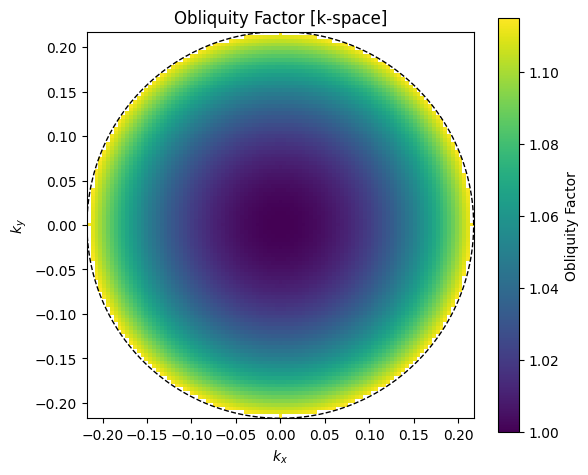

In [36]:
N = 101
x = np.linspace(-k_pupil, k_pupil, N)
y = np.linspace(-k_pupil, k_pupil, N)
X, Y = np.meshgrid(x, y)
r_object2 = X**2 + Y**2
n_obj = 1
n_obj2 = n_obj*n_obj
cos_object2 = (n_obj2 - r_object2) / n_obj2
pupil_mask = r_object2 <= k_pupil**2

x = np.linspace(-k_propagating, k_propagating, N)
y = np.linspace(-k_propagating, k_propagating, N)
X, Y = np.meshgrid(x, y)
r_imging2 = X**2 + Y**2
n_img = 1
n_img2 = n_img * n_img
cos_imging2 = (n_img2 - r_imging2) / n_img2
# oblique_factor = np.sqrt(cos_object2/cos_imging2)

eps = 1e-12
valid = (
    (cos_object2 > 0.0) &
    (cos_imging2 > eps)
)

oblique_factor = np.zeros_like(cos_object2, dtype=np.float64)
oblique_factor[valid] = np.sqrt(
    cos_object2[valid]/cos_imging2[valid]
)
print(np.min(oblique_factor[valid]))


obliquity_masked = np.ma.masked_where(~pupil_mask, oblique_factor)
plt.figure(figsize=(6, 5))
im = plt.imshow(
    obliquity_masked,
    extent=[-k_pupil, k_pupil, -k_pupil, k_pupil],
    origin='lower'
)
plt.colorbar(im, label='Obliquity Factor')

plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.title('Obliquity Factor [k-space]')

# draw pupil boundary
theta = np.linspace(0, 2*np.pi, 400)
plt.plot(k_pupil*np.cos(theta), k_pupil*np.sin(theta), 'k--', linewidth=1)

plt.tight_layout()
plt.show()

你好！这是光刻仿真算法中最底层、也最核心的**傅里叶光学（Fourier Optics）**问题。你关注到了“频谱步长”和“范围”这个细节，这是理解成像分辨率和仿真精度的关键。

在计算光刻（OPC/SMO）中，光从掩膜（Nearfield）传播到晶圆（Aerial Image）的过程，本质上是一次**低通滤波**和**非线性变换**的过程。

我们分两个维度来剖析：**频谱范围（Range/Bandwidth）** 和 **频谱步长（Step/Pitch）**。

---

### 1. 前置概念：坐标系必须统一
在讨论之前，我们必须先约定一个坐标系。通常仿真软件（如S-Litho, Calibre）为了方便，会**把所有数据都归一化到晶圆尺度（Wafer Scale）**。
* **如果不特别说明，下文默认处于“晶圆尺度”**（即Mask图形已经被除以了放大倍率 $M$, $M=4$）。

---

### 2. 频谱步长 (Spectrum Step, $\Delta f$)

频谱步长代表了频域的“分辨率”。在离散傅里叶变换（DFT/FFT）中，它由**空间域的仿真窗口大小（Simulation Domain Size, $L$）** 决定。

$$\Delta f = \frac{1}{L}$$

#### 变化分析：
* **Nearfield (Mask) $\rightarrow$ Pupil $\rightarrow$ Aerial Image (Wafer)**
    * **结论：步长保持不变。**
    * **原因：** 在一次仿真计算中，为了能进行 FFT/IFFT 运算，Mask 的矩阵大小和 Wafer 的矩阵大小通常是一一对应的（或者存在简单的 Padding 关系）。只要你的仿真窗口 $L$（例如 $2 \mu m \times 2 \mu m$）没有变，频域中两个相邻像素代表的频率差 $\Delta f$ 就是恒定的。

> **进阶点拨（如果考虑物理尺度）：**
> 如果你非要较真“物理掩膜”和“物理晶圆”的区别：
> * 物理掩膜尺寸是 $L_{mask}$，物理晶圆尺寸是 $L_{wafer} = L_{mask} / M$。
> * 因此，物理频谱步长 $\Delta f_{wafer} = M \times \Delta f_{mask}$。
> * **含义：** 掩膜上两条衍射光束如果是“很挤”的（频率差小），经过缩小投影到晶圆侧，它们的角度张开得更大了，频率差变大了（变疏了）。

---

### 3. 频谱范围 (Spectrum Range / Bandwidth)

这是变化的重头戏。频谱范围决定了图像包含了多少“细节”。

#### A. Nearfield (Mask 阶段)
* **范围：极宽（取决于网格精度）。**
* 掩膜通常是曼哈顿图形（矩形边缘），在数学上，理想的台阶函数频谱是无限宽的。
* 在仿真代码中，范围由你的**采样率（Pixel Size, $dx$）** 决定：
    $$f_{max\_mask} = \frac{1}{2 \cdot dx} \quad (\text{Nyquist Limit})$$
* 这个值通常非常大，远超光学系统的传递能力。

#### B. Pupil Plane (投影物镜阶段)
* **范围：被剧烈“截断”（Cut-off）。**
* 光刻机镜头是一个低通滤波器。只有特定角度内的衍射光能通过光阑（Aperture）。
* **截止频率（Cut-off Frequency）：**
    $$f_{cutoff} = \frac{NA}{\lambda}$$
* **变化：** 所有高于 $NA/\lambda$ 的高频信息（Mask上的微小锐角、粗糙度）在这里被**直接丢弃**，赋值为 0。这是光刻分辨率受限的根本原因。

#### C. Aerial Image (Wafer Intensity 阶段)
* **范围：轻微“膨胀”（倍频效应）。**
* 注意！这是很多人的盲区。Aerial Image 是光强（Intensity, $I$），而光强是电场（Electric Field, $E$）的模平方：
    $$I(x) = |E(x)|^2 = E(x) \cdot E^*(x)$$
* 根据卷积定理，时域（空域）的乘积等于频域的卷积。
    $$\mathcal{F}\{I\} = \mathcal{F}\{E\} \otimes \mathcal{F}\{E^*\}$$
* **结论：** 两个带宽为 $[-f_{c}, f_{c}]$ 的信号卷积，结果的带宽会变成 $[-2f_{c}, 2f_{c}]$。
* **最终范围：**
    $$f_{max\_image} = \frac{2 \cdot NA}{\lambda}$$

---

### 4. 总结图表：从 Nearfield 到 Aerial Image

假设我们使用 **晶圆坐标系**，仿真窗口大小为 $L$，光波长 $\lambda$，数值孔径 $NA$。

| 阶段 | 物理量 | 频谱步长 ($\Delta f$) | 频谱最大范围 ($f_{max}$) | 代码中的体现 |
| :--- | :--- | :--- | :--- | :--- |
| **1. Nearfield** | 电场 $E_{mask}$ | $1/L$ | $1/(2dx)$ (很高) | `fft2(mask)` 的全尺寸 |
| **2. Pupil** | 电场 $E_{pupil}$ | $1/L$ | $NA/\lambda$ (被截断) | `TCC` 或 `Pupil Function` 的非零半径 |
| **3. Wafer Field** | 电场 $E_{wafer}$ | $1/L$ | $NA/\lambda$ | `ifft2` 后的复数场 |
| **4. Aerial Image**| 光强 $I_{wafer}$ | $1/L$ | **$2 \cdot NA/\lambda$** | `abs(E_wafer).^2` 的频谱 |



---

### 5. “代码实战”建议

你在写仿真代码时，这个原理对应了两个具体的优化技巧：

1.  **Low-pass Grid Downsampling（低通降采样）：**
    * 既然 Nearfield 只有中间 $NA/\lambda$ 范围内的频率有用，你在计算 `ifft` 变回空域之前，可以直接把高频部分的 0 砍掉（Crop），把矩阵变小。
    * **好处：** 计算量大幅下降，且不损失物理精度。

2.  **Simulation Grid Sizing（网格选定）：**
    * 为了不发生混叠（Aliasing），你的晶圆网格 $dx_{wafer}$ 必须满足 $2 \cdot NA / \lambda$ 的采样要求，而不是 $NA / \lambda$。
    * **公式：** $dx_{wafer} \le \frac{1}{2 \cdot (2NA/\lambda)} = \frac{\lambda}{4NA}$。
    * 这就是为什么行业里常说，仿真网格一般设为 $\lambda / (4NA)$ 或更小。

**一句话总结：**
从 Nearfield 到 Aerial Image，**步长不变**（由窗口决定），但**有效范围先被光学系统砍掉一刀（$NA/\lambda$），最后因为变成光强又扩张了一倍（$2NA/\lambda$）。**